<a href="https://colab.research.google.com/github/tadie1921/CV_Leaf_segmentation_algorithm/blob/main/Segmentation_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Write your Segmentation Algorithm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import skimage.util as util
import skimage.io as io
import numpy as np
import os as os

# You can import other modules as needed.

# You can import other modules as needed.
import skimage.color
from skimage import measure
import cv2
import scipy


from skimage.color import rgb2hsv, rgb2gray
def segleaf(I):

    '''
    Segment a leaf image.
    :param I: Color leaf image to segment.
    :return: Logical image where True pixels represent foreground (i.e. leaf pixels).
    '''
    hsv_image = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)


    green_mask = cv2.inRange(hsv_image, np.array([34, 43, 30]), np.array([90, 255, 255]))
    output = cv2.bitwise_and(I, I, mask=green_mask)


    image = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)

    threshold = otsu(image)
    segmented_image = image > threshold[0]

    return segmented_image




def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weigth = 1.0/pixel_number
    his, bins = np.histogram(gray, np.array(range(0, 256)))
    final_thresh = -1
    final_value = -1
    for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
        Wb = np.sum(his[:t]) * mean_weigth
        Wf = np.sum(his[t:]) * mean_weigth

        mub = np.mean(his[:t])
        muf = np.mean(his[t:])

        value = Wb * Wf * (mub - muf) ** 2

        print("Wb", Wb, "Wf", Wf)
        print("t", t, "value", value)

        if value > final_value:
            final_thresh = t
            final_value = value
    final_img = gray.copy()
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img


# Step 2: Implment Measures

Write functions to compute the Dice Similarity Coefficient (DSC) measure of segmentation quality.  

In [ ]:
    # Dice similarity function
def dice_similarity_coefficient(s, g):
  # Compute Dice coefficient
  intersection = np.logical_and(s, g)
  dice = 2.0 * abs(intersection.sum()) / (abs(s.sum()) + abs(g.sum()))
  return dice


# Step 3: Write a Validation driver program.

Write code that segments each image, and computes the DSC for each segmentation.  Print the DSC of each segmentation as you perform it.  At the end, print the average and standard deviation of the DSC over all of the images.  Also print the percentage of regions that were "recognized" (see below).  Sample output is in the assignment description document.

The general approach should be, for each input image (in the `images` folder):

* load the image and it's ground truth
* segment the input image - this should be a binary image with a single region (connected component).
* Compute the DSC from the segmented image and the ground truth image (using the function from Step 2).
* Determine whether the leaf was "recognized" (a leaf is recognized if it's DSC is greater than 0.6).
* DSC to the console (see sample output).

When finished, don't forget to print the average and standard deviation of the DSC for all images, and the percentage of images where the leaf was "recognized".

_Feel free to define additional helper functions for your program if you think it will help._

In [ ]:
#### Validate ####


# Paths for folders -- original and ground truth images
path="/content/drive/MyDrive/computer vision"
images_path = os.path.join(path, 'images')
gt_path = os.path.join(path, 'groundtruth')

img_res = []
dice_val=[]
perc_valu=[]

# Iterate over all files in the original images folder
for root, dirs, files in os.walk(images_path):
    for filename in files:
        # ignore files that are not PNG files.
        if filename[-4:] != '.png':
            continue

        file_name = os.path.join(root, filename)

        im=cv2.imread(file_name)
        # concatenate variable root with filename to get the path to an input file.

        #Segment the image based on threshold
        threshold_img=segleaf(im)

        # save the image
        io.imsave(os.path.join(path,'segmented_img', "bin_thre_" + filename[:-4]+'.png'),  np.clip(threshold_img, 0, 1))

        #load images
        y_pred = cv2.imread(os.path.join(path,'segmented_img', "bin_thre_" +  filename[:-4]+'.png'))

        y_pred_gray_file = rgb2gray(y_pred) #convert to grayscale


        gt = cv2.imread(os.path.join(path,'groundtruth', "thresh" +  filename[:-4]+'.png'))

        gt_gray_file = rgb2gray(gt) #convert to grayscale



        dice_score = dice_similarity_coefficient(y_pred_gray_file, gt_gray_file)
        dice_val.append(dice_score)

        img_res.append("DSC for {} : {}".format(filename[:-4]+'.png',dice_score))
        perc_valu.append("DSC for {} : {}".format(filename[:-4]+'.png',dice_score*100))




Wb 0.8553971102799228 Wf 0.14460288972007723
t 1 value 25430884540.21189
Wb 0.8553971102799228 Wf 0.14460288972007723
t 2 value 6349188759.56982
Wb 0.8553971102799228 Wf 0.14460288972007723
t 3 value 2818041984.2162995
Wb 0.8553971102799228 Wf 0.14460288972007723
t 4 value 1582984394.824879
Wb 0.8553971102799228 Wf 0.14460288972007723
t 5 value 1011714787.8230166
Wb 0.8553971102799228 Wf 0.14460288972007723
t 6 value 701603700.9304742
Wb 0.8553971102799228 Wf 0.14460288972007723
t 7 value 514741594.52166384
Wb 0.8553971102799228 Wf 0.14460288972007723
t 8 value 393541899.2161988
Wb 0.8553971102799228 Wf 0.14460288972007723
t 9 value 310503217.37202793
Wb 0.8553971102799228 Wf 0.14460288972007723
t 10 value 251145723.8026831
Wb 0.8553971102799228 Wf 0.14460288972007723
t 11 value 207257139.69668373
Wb 0.8553971102799228 Wf 0.14460288972007723
t 12 value 173898487.2691538
Wb 0.8553971102799228 Wf 0.14460288972007723
t 13 value 147954876.43113858
Wb 0.8553971102799228 Wf 0.144602889720077

Wb 0.859195900699807 Wf 0.14080409930019305
t 1 value 25095204116.973816
Wb 0.859195900699807 Wf 0.14080409930019305
t 2 value 6265638800.670193
Wb 0.859195900699807 Wf 0.14080409930019305
t 3 value 2781074297.2966423
Wb 0.859195900699807 Wf 0.14080409930019305
t 4 value 1562283872.1257443
Wb 0.859195900699807 Wf 0.14080409930019305
t 5 value 998526896.744515
Wb 0.859195900699807 Wf 0.14080409930019305
t 6 value 692487705.904177
Wb 0.859195900699807 Wf 0.14080409930019305
t 7 value 508075392.66116947
Wb 0.859195900699807 Wf 0.14080409930019305
t 8 value 388462190.1176687
Wb 0.859195900699807 Wf 0.14080409930019305
t 9 value 306508795.3015603
Wb 0.859195900699807 Wf 0.14080409930019305
t 10 value 247925881.80937228
Wb 0.859195900699807 Wf 0.14080409930019305
t 11 value 204609128.88890865
Wb 0.859195900699807 Wf 0.14080409930019305
t 12 value 171684435.8657815
Wb 0.859195900699807 Wf 0.14080409930019305
t 13 value 146077797.31826174
Wb 0.859195900699807 Wf 0.14080409930019305
t 14 value 

Wb 0.8435369660955598 Wf 0.15646303390444016
t 1 value 26384508942.81778
Wb 0.8435369660955598 Wf 0.15646303390444016
t 2 value 6586413866.8873005
Wb 0.8435369660955598 Wf 0.15646303390444016
t 3 value 2922946955.7468567
Wb 0.8435369660955598 Wf 0.15646303390444016
t 4 value 1641694209.602792
Wb 0.8435369660955598 Wf 0.15646303390444016
t 5 value 1049096267.5737951
Wb 0.8435369660955598 Wf 0.15646303390444016
t 6 value 727428264.7730573
Wb 0.8435369660955598 Wf 0.15646303390444016
t 7 value 533615035.92525256
Wb 0.8435369660955598 Wf 0.15646303390444016
t 8 value 407915018.8994755
Wb 0.8435369660955598 Wf 0.15646303390444016
t 9 value 321798613.1962532
Wb 0.8435369660955598 Wf 0.15646303390444016
t 10 value 260245128.81587633
Wb 0.8435369660955598 Wf 0.15646303390444016
t 11 value 214735814.41293502
Wb 0.8435369660955598 Wf 0.15646303390444016
t 12 value 180147543.78185594
Wb 0.8435369660955598 Wf 0.15646303390444016
t 13 value 153249395.04967725
Wb 0.8435369660955598 Wf 0.156463033904

Wb 0.8408504765926641 Wf 0.1591495234073359
t 1 value 26581140759.38593
Wb 0.8408504765926641 Wf 0.1591495234073359
t 2 value 6635299533.178717
Wb 0.8408504765926641 Wf 0.1591495234073359
t 3 value 2944552099.152202
Wb 0.8408504765926641 Wf 0.1591495234073359
t 4 value 1653778123.5861971
Wb 0.8408504765926641 Wf 0.1591495234073359
t 5 value 1056785531.3461626
Wb 0.8408504765926641 Wf 0.1591495234073359
t 6 value 732736962.8678024
Wb 0.8408504765926641 Wf 0.1591495234073359
t 7 value 537492324.9705747
Wb 0.8408504765926641 Wf 0.1591495234073359
t 8 value 410865856.6659089
Wb 0.8408504765926641 Wf 0.1591495234073359
t 9 value 324116050.4720064
Wb 0.8408504765926641 Wf 0.1591495234073359
t 10 value 262110763.772014
Wb 0.8408504765926641 Wf 0.1591495234073359
t 11 value 216268101.7726136
Wb 0.8408504765926641 Wf 0.1591495234073359
t 12 value 181427003.2803143
Wb 0.8408504765926641 Wf 0.1591495234073359
t 13 value 154332647.18089667
Wb 0.8408504765926641 Wf 0.1591495234073359
t 14 value 132

Wf 0.031977708735521235
t 120 value 533965.8661792326
Wb 0.9712441934121622 Wf 0.02875580658783784
t 121 value 479580.92501049524
Wb 0.9740004373793436 Wf 0.02599956262065637
t 122 value 432165.82547560637
Wb 0.9764870897683398 Wf 0.02351291023166023
t 123 value 389084.86381310486
Wb 0.9786702159749034 Wf 0.021329784025096526
t 124 value 350917.62047186994
Wb 0.980610144184363 Wf 0.019389855815637066
t 125 value 316832.5990497025
Wb 0.9824256455115831 Wf 0.017574354488416988
t 126 value 285092.6573205162
Wb 0.9840488507480695 Wf 0.015951149251930502
t 127 value 256691.09813088225
Wb 0.9855325470559846 Wf 0.014467452944015444
t 128 value 230832.69844107205
Wb 0.9868371440637066 Wf 0.013162855936293436
t 129 value 208076.67983806576
Wb 0.9878891167953668 Wf 0.012110883204633206
t 130 value 189464.4224268834
Wb 0.9889618273407336 Wf 0.01103817265926641
t 131 value 170942.41043138856
Wb 0.9898912584459459 Wf 0.010108741554054054
t 132 value 154881.50334874738
Wb 0.9906717543436294 Wf 0.009

 0.0
Wb 1.0 Wf 0.0
t 253 value 0.0
Wb 1.0 Wf 0.0
t 254 value 0.0
Wb 0.8290996772442085 Wf 0.1709003227557915
t 1 value 27360081407.7123
Wb 0.8290996772442085 Wf 0.1709003227557915
t 2 value 6828826378.824096
Wb 0.8290996772442085 Wf 0.1709003227557915
t 3 value 3030023485.0160046
Wb 0.8290996772442085 Wf 0.1709003227557915
t 4 value 1701549724.9155471
Wb 0.8290996772442085 Wf 0.1709003227557915
t 5 value 1087162192.4247649
Wb 0.8290996772442085 Wf 0.1709003227557915
t 6 value 753694043.0135459
Wb 0.8290996772442085 Wf 0.1709003227557915
t 7 value 552787434.9286498
Wb 0.8290996772442085 Wf 0.1709003227557915
t 8 value 422497617.9673653
Wb 0.8290996772442085 Wf 0.1709003227557915
t 9 value 333244094.61862886
Wb 0.8290996772442085 Wf 0.1709003227557915
t 10 value 269453530.0379428
Wb 0.8290996772442085 Wf 0.1709003227557915
t 11 value 222294114.6040606
Wb 0.8290996772442085 Wf 0.1709003227557915
t 12 value 186454670.13652602
Wb 0.8290996772442085 Wf 0.1709003227557915
t 13 value 158585817

 Wf 0.0
t 252 value 0.0
Wb 1.0 Wf 0.0
t 253 value 0.0
Wb 1.0 Wf 0.0
t 254 value 0.0
Wb 0.8589904078185329 Wf 0.1410095921814672
t 1 value 25113745627.935055
Wb 0.8589904078185329 Wf 0.1410095921814672
t 2 value 6270254265.460876
Wb 0.8589904078185329 Wf 0.1410095921814672
t 3 value 2783116704.4451017
Wb 0.8589904078185329 Wf 0.1410095921814672
t 4 value 1563427679.6920316
Wb 0.8589904078185329 Wf 0.1410095921814672
t 5 value 999255681.6983434
Wb 0.8589904078185329 Wf 0.1410095921814672
t 6 value 692991532.7689124
Wb 0.8589904078185329 Wf 0.1410095921814672
t 7 value 508443869.0955011
Wb 0.8589904078185329 Wf 0.1410095921814672
t 8 value 388743008.1269746
Wb 0.8589904078185329 Wf 0.1410095921814672
t 9 value 306729644.4779947
Wb 0.8589904078185329 Wf 0.1410095921814672
t 10 value 248103928.12452072
Wb 0.8589904078185329 Wf 0.1410095921814672
t 11 value 204755574.271852
Wb 0.8589904078185329 Wf 0.1410095921814672
t 12 value 171806898.06541666
Wb 0.8589904078185329 Wf 0.1410095921814672
t


Wb 1.0 Wf 0.0
t 240 value 0.0
Wb 1.0 Wf 0.0
t 241 value 0.0
Wb 1.0 Wf 0.0
t 242 value 0.0
Wb 1.0 Wf 0.0
t 243 value 0.0
Wb 1.0 Wf 0.0
t 244 value 0.0
Wb 1.0 Wf 0.0
t 245 value 0.0
Wb 1.0 Wf 0.0
t 246 value 0.0
Wb 1.0 Wf 0.0
t 247 value 0.0
Wb 1.0 Wf 0.0
t 248 value 0.0
Wb 1.0 Wf 0.0
t 249 value 0.0
Wb 1.0 Wf 0.0
t 250 value 0.0
Wb 1.0 Wf 0.0
t 251 value 0.0
Wb 1.0 Wf 0.0
t 252 value 0.0
Wb 1.0 Wf 0.0
t 253 value 0.0
Wb 1.0 Wf 0.0
t 254 value 0.0
Wb 0.8464817356418919 Wf 0.15351826435810811
t 1 value 26160850020.39947
Wb 0.8464817356418919 Wf 0.15351826435810811
t 2 value 6530795689.850076
Wb 0.8464817356418919 Wf 0.15351826435810811
t 3 value 2898360445.8471174
Wb 0.8464817356418919 Wf 0.15351826435810811
t 4 value 1627939429.046527
Wb 0.8464817356418919 Wf 0.15351826435810811
t 5 value 1040341614.3633354
Wb 0.8464817356418919 Wf 0.15351826435810811
t 6 value 721382486.0246527
Wb 0.8464817356418919 Wf 0.15351826435810811
t 7 value 529198270.13447726
Wb 0.8464817356418919 Wf 0.15351826

Wb 0.8406393279440154 Wf 0.15936067205598456
t 1 value 26596298027.90466
Wb 0.8406393279440154 Wf 0.15936067205598456
t 2 value 6639067381.630436
Wb 0.8406393279440154 Wf 0.15936067205598456
t 3 value 2946217093.7090287
Wb 0.8406393279440154 Wf 0.15936067205598456
t 4 value 1654709244.5052032
Wb 0.8406393279440154 Wf 0.15936067205598456
t 5 value 1057377944.9218242
Wb 0.8406393279440154 Wf 0.15936067205598456
t 6 value 733145911.7432084
Wb 0.8406393279440154 Wf 0.15936067205598456
t 7 value 537790965.5715432
Wb 0.8406393279440154 Wf 0.15936067205598456
t 8 value 411093107.0330429
Wb 0.8406393279440154 Wf 0.15936067205598456
t 9 value 324294495.6065743
Wb 0.8406393279440154 Wf 0.15936067205598456
t 10 value 262254398.58027774
Wb 0.8406393279440154 Wf 0.15936067205598456
t 11 value 216386054.60215068
Wb 0.8406393279440154 Wf 0.15936067205598456
t 12 value 181525478.86760524
Wb 0.8406393279440154 Wf 0.15936067205598456
t 13 value 154416008.43160075
Wb 0.8406393279440154 Wf 0.1593606720559

209 value 0.0
Wb 1.0 Wf 0.0
t 210 value 0.0
Wb 1.0 Wf 0.0
t 211 value 0.0
Wb 1.0 Wf 0.0
t 212 value 0.0
Wb 1.0 Wf 0.0
t 213 value 0.0
Wb 1.0 Wf 0.0
t 214 value 0.0
Wb 1.0 Wf 0.0
t 215 value 0.0
Wb 1.0 Wf 0.0
t 216 value 0.0
Wb 1.0 Wf 0.0
t 217 value 0.0
Wb 1.0 Wf 0.0
t 218 value 0.0
Wb 1.0 Wf 0.0
t 219 value 0.0
Wb 1.0 Wf 0.0
t 220 value 0.0
Wb 1.0 Wf 0.0
t 221 value 0.0
Wb 1.0 Wf 0.0
t 222 value 0.0
Wb 1.0 Wf 0.0
t 223 value 0.0
Wb 1.0 Wf 0.0
t 224 value 0.0
Wb 1.0 Wf 0.0
t 225 value 0.0
Wb 1.0 Wf 0.0
t 226 value 0.0
Wb 1.0 Wf 0.0
t 227 value 0.0
Wb 1.0 Wf 0.0
t 228 value 0.0
Wb 1.0 Wf 0.0
t 229 value 0.0
Wb 1.0 Wf 0.0
t 230 value 0.0
Wb 1.0 Wf 0.0
t 231 value 0.0
Wb 1.0 Wf 0.0
t 232 value 0.0
Wb 1.0 Wf 0.0
t 233 value 0.0
Wb 1.0 Wf 0.0
t 234 value 0.0
Wb 1.0 Wf 0.0
t 235 value 0.0
Wb 1.0 Wf 0.0
t 236 value 0.0
Wb 1.0 Wf 0.0
t 237 value 0.0
Wb 1.0 Wf 0.0
t 238 value 0.0
Wb 1.0 Wf 0.0
t 239 value 0.0
Wb 1.0 Wf 0.0
t 240 value 0.0
Wb 1.0 Wf 0.0
t 241 value 0.0
Wb 1.0 Wf 0.0
t 242 value 

 Wf 0.0
t 243 value 0.0
Wb 1.0 Wf 0.0
t 244 value 0.0
Wb 1.0 Wf 0.0
t 245 value 0.0
Wb 1.0 Wf 0.0
t 246 value 0.0
Wb 1.0 Wf 0.0
t 247 value 0.0
Wb 1.0 Wf 0.0
t 248 value 0.0
Wb 1.0 Wf 0.0
t 249 value 0.0
Wb 1.0 Wf 0.0
t 250 value 0.0
Wb 1.0 Wf 0.0
t 251 value 0.0
Wb 1.0 Wf 0.0
t 252 value 0.0
Wb 1.0 Wf 0.0
t 253 value 0.0
Wb 1.0 Wf 0.0
t 254 value 0.0
Wb 0.8503106901544402 Wf 0.14968930984555984
t 1 value 25857166453.47054
Wb 0.8503106901544402 Wf 0.14968930984555984
t 2 value 6455257213.535684
Wb 0.8503106901544402 Wf 0.14968930984555984
t 3 value 2864958891.1619544
Wb 0.8503106901544402 Wf 0.14968930984555984
t 4 value 1609247946.0594432
Wb 0.8503106901544402 Wf 0.14968930984555984
t 5 value 1028441493.9216462
Wb 0.8503106901544402 Wf 0.14968930984555984
t 6 value 713162159.925597
Wb 0.8503106901544402 Wf 0.14968930984555984
t 7 value 523191131.16001284
Wb 0.8503106901544402 Wf 0.14968930984555984
t 8 value 399978396.5057213
Wb 0.8503106901544402 Wf 0.14968930984555984
t 9 value 3155

 2395.0469298071125
Wb 0.9995739321911197 Wf 0.0004260678088803089
t 230 value 2245.5068559288256
Wb 0.9995946700048263 Wf 0.0004053299951737452
t 231 value 2117.967920433546
Wb 0.9996304898648649 Wf 0.00036951013513513516
t 232 value 1915.0654344374695
Wb 0.9996776212596525 Wf 0.00032237874034749035
t 233 value 1657.7622730203227
Wb 0.9997021295849421 Wf 0.00029787041505791506
t 234 value 1519.0718848623078
Wb 0.9997360641891893 Wf 0.0002639358108108108
t 235 value 1335.301994604579
Wb 0.9997662282818534 Wf 0.00023377171814671814
t 236 value 1173.2657924220537
Wb 0.9997813103281854 Wf 0.0002186896718146718
t 237 value 1088.4309226594257
Wb 0.9998020481418919 Wf 0.00019795185810810812
t 238 value 977.2286812319394
Wb 0.999820900699807 Wf 0.0001790993001930502
t 239 value 876.9945403248263
Wb 0.9998454090250966 Wf 0.00015459097490347492
t 240 value 751.0489531645461
Wb 0.9998642615830116 Wf 0.000135738416988417
t 241 value 654.2127948325358
Wb 0.9998774583735521 Wf 0.0001225416264478764

value 0.0
Wb 1.0 Wf 0.0
t 249 value 0.0
Wb 1.0 Wf 0.0
t 250 value 0.0
Wb 1.0 Wf 0.0
t 251 value 0.0
Wb 1.0 Wf 0.0
t 252 value 0.0
Wb 1.0 Wf 0.0
t 253 value 0.0
Wb 1.0 Wf 0.0
t 254 value 0.0
Wb 0.872051459942085 Wf 0.12794854005791506
t 1 value 23846202562.14923
Wb 0.872051459942085 Wf 0.12794854005791506
t 2 value 5954606910.623216
Wb 0.872051459942085 Wf 0.12794854005791506
t 3 value 2643383185.0034566
Wb 0.872051459942085 Wf 0.12794854005791506
t 4 value 1485141461.7099824
Wb 0.872051459942085 Wf 0.12794854005791506
t 5 value 949354781.3741232
Wb 0.872051459942085 Wf 0.12794854005791506
t 6 value 658479577.7103009
Wb 0.872051459942085 Wf 0.12794854005791506
t 7 value 483192792.54391134
Wb 0.872051459942085 Wf 0.12794854005791506
t 8 value 369490832.3233418
Wb 0.872051459942085 Wf 0.12794854005791506
t 9 value 291582243.0570711
Wb 0.872051459942085 Wf 0.12794854005791506
t 10 value 235886896.435438
Wb 0.872051459942085 Wf 0.12794854005791506
t 11 value 194702435.1411742
Wb 0.872051459

Wb 0.8012563344594594 Wf 0.19874366554054054
t 1 value 28709030952.596638
Wb 0.8012563344594594 Wf 0.19874366554054054
t 2 value 7163122386.358513
Wb 0.8012563344594594 Wf 0.19874366554054054
t 3 value 3177283977.2468076
Wb 0.8012563344594594 Wf 0.19874366554054054
t 4 value 1783639105.5854821
Wb 0.8012563344594594 Wf 0.19874366554054054
t 5 value 1139219806.4781177
Wb 0.8012563344594594 Wf 0.19874366554054054
t 6 value 789510002.5798607
Wb 0.8012563344594594 Wf 0.19874366554054054
t 7 value 578853394.020069
Wb 0.8012563344594594 Wf 0.19874366554054054
t 8 value 442263430.83119625
Wb 0.8012563344594594 Wf 0.19874366554054054
t 9 value 348709698.8099204
Wb 0.8012563344594594 Wf 0.19874366554054054
t 10 value 281856900.5254937
Wb 0.8012563344594594 Wf 0.19874366554054054
t 11 value 232441888.559538
Wb 0.8012563344594594 Wf 0.19874366554054054
t 12 value 194894559.22996658
Wb 0.8012563344594594 Wf 0.19874366554054054
t 13 value 165702541.82392138
Wb 0.8012563344594594 Wf 0.198743665540540


t 211 value 35.740048159696066
Wb 0.9999943442326255 Wf 5.655767374517375e-06
t 212 value 35.40361913064623
Wb 0.9999943442326255 Wf 5.655767374517375e-06
t 213 value 35.07191511340688
Wb 0.9999943442326255 Wf 5.655767374517375e-06
t 214 value 34.744847833493125
Wb 0.999996229488417 Wf 3.770511583011583e-06
t 215 value 22.94881559340698
Wb 0.999996229488417 Wf 3.770511583011583e-06
t 216 value 22.736790405300415
Wb 0.999996229488417 Wf 3.770511583011583e-06
t 217 value 22.52768834910595
Wb 0.9999981147442085 Wf 1.8852557915057915e-06
t 218 value 11.161038976764333
Wb 0.9999981147442085 Wf 1.8852557915057915e-06
t 219 value 11.059336407802821
Wb 0.9999981147442085 Wf 1.8852557915057915e-06
t 220 value 10.959017121879581
Wb 0.9999981147442085 Wf 1.8852557915057915e-06
t 221 value 10.860056103157683
Wb 0.9999981147442085 Wf 1.8852557915057915e-06
t 222 value 10.762428893682557
Wb 0.9999981147442085 Wf 1.8852557915057915e-06
t 223 value 10.666111577746621
Wb 0.9999981147442085 Wf 1.885255

Wb 0.9115381424951737 Wf 0.08846185750482626
t 1 value 18836842066.887432
Wb 0.9115381424951737 Wf 0.08846185750482626
t 2 value 4705582848.55546
Wb 0.9115381424951737 Wf 0.08846185750482626
t 3 value 2089745690.6018097
Wb 0.9115381424951737 Wf 0.08846185750482626
t 4 value 1174561268.0954072
Wb 0.9115381424951737 Wf 0.08846185750482626
t 5 value 751125494.2737525
Wb 0.9115381424951737 Wf 0.08846185750482626
t 6 value 521199476.07056075
Wb 0.9115381424951737 Wf 0.08846185750482626
t 7 value 382614496.6592969
Wb 0.9115381424951737 Wf 0.08846185750482626
t 8 value 292701931.7496334
Wb 0.9115381424951737 Wf 0.08846185750482626
t 9 value 231081724.53280193
Wb 0.9115381424951737 Wf 0.08846185750482626
t 10 value 187021971.42829466
Wb 0.9115381424951737 Wf 0.08846185750482626
t 11 value 154435162.14015114
Wb 0.9115381424951737 Wf 0.08846185750482626
t 12 value 129659657.73668629
Wb 0.9115381424951737 Wf 0.08846185750482626
t 13 value 110385822.51421162
Wb 0.9115381424951737 Wf 0.088461857504

Wb 0.8709598968388031 Wf 0.1290401031611969
t 1 value 23959172426.073223
Wb 0.8709598968388031 Wf 0.1290401031611969
t 2 value 5982748123.596408
Wb 0.8709598968388031 Wf 0.1290401031611969
t 3 value 2655845076.9160824
Wb 0.8709598968388031 Wf 0.1290401031611969
t 4 value 1492125609.2781072
Wb 0.8709598968388031 Wf 0.1290401031611969
t 5 value 953808094.347802
Wb 0.8709598968388031 Wf 0.1290401031611969
t 6 value 661560588.4714184
Wb 0.8709598968388031 Wf 0.1290401031611969
t 7 value 485447833.77451843
Wb 0.8709598968388031 Wf 0.1290401031611969
t 8 value 371210749.396365
Wb 0.8709598968388031 Wf 0.1290401031611969
t 9 value 292935939.0292418
Wb 0.8709598968388031 Wf 0.1290401031611969
t 10 value 236979106.75869915
Wb 0.8709598968388031 Wf 0.1290401031611969
t 11 value 195601523.04862726
Wb 0.8709598968388031 Wf 0.1290401031611969
t 12 value 164148814.9086025
Wb 0.8709598968388031 Wf 0.1290401031611969
t 13 value 139685463.06438658
Wb 0.8709598968388031 Wf 0.1290401031611969
t 14 value 

 0.0
t 223 value 0.0
Wb 1.0 Wf 0.0
t 224 value 0.0
Wb 1.0 Wf 0.0
t 225 value 0.0
Wb 1.0 Wf 0.0
t 226 value 0.0
Wb 1.0 Wf 0.0
t 227 value 0.0
Wb 1.0 Wf 0.0
t 228 value 0.0
Wb 1.0 Wf 0.0
t 229 value 0.0
Wb 1.0 Wf 0.0
t 230 value 0.0
Wb 1.0 Wf 0.0
t 231 value 0.0
Wb 1.0 Wf 0.0
t 232 value 0.0
Wb 1.0 Wf 0.0
t 233 value 0.0
Wb 1.0 Wf 0.0
t 234 value 0.0
Wb 1.0 Wf 0.0
t 235 value 0.0
Wb 1.0 Wf 0.0
t 236 value 0.0
Wb 1.0 Wf 0.0
t 237 value 0.0
Wb 1.0 Wf 0.0
t 238 value 0.0
Wb 1.0 Wf 0.0
t 239 value 0.0
Wb 1.0 Wf 0.0
t 240 value 0.0
Wb 1.0 Wf 0.0
t 241 value 0.0
Wb 1.0 Wf 0.0
t 242 value 0.0
Wb 1.0 Wf 0.0
t 243 value 0.0
Wb 1.0 Wf 0.0
t 244 value 0.0
Wb 1.0 Wf 0.0
t 245 value 0.0
Wb 1.0 Wf 0.0
t 246 value 0.0
Wb 1.0 Wf 0.0
t 247 value 0.0
Wb 1.0 Wf 0.0
t 248 value 0.0
Wb 1.0 Wf 0.0
t 249 value 0.0
Wb 1.0 Wf 0.0
t 250 value 0.0
Wb 1.0 Wf 0.0
t 251 value 0.0
Wb 1.0 Wf 0.0
t 252 value 0.0
Wb 1.0 Wf 0.0
t 253 value 0.0
Wb 1.0 Wf 0.0
t 254 value 0.0
Wb 0.8505538881515444 Wf 0.1494461118484556
t 1 v

1.0 Wf 0.0
t 169 value 0.0
Wb 1.0 Wf 0.0
t 170 value 0.0
Wb 1.0 Wf 0.0
t 171 value 0.0
Wb 1.0 Wf 0.0
t 172 value 0.0
Wb 1.0 Wf 0.0
t 173 value 0.0
Wb 1.0 Wf 0.0
t 174 value 0.0
Wb 1.0 Wf 0.0
t 175 value 0.0
Wb 1.0 Wf 0.0
t 176 value 0.0
Wb 1.0 Wf 0.0
t 177 value 0.0
Wb 1.0 Wf 0.0
t 178 value 0.0
Wb 1.0 Wf 0.0
t 179 value 0.0
Wb 1.0 Wf 0.0
t 180 value 0.0
Wb 1.0 Wf 0.0
t 181 value 0.0
Wb 1.0 Wf 0.0
t 182 value 0.0
Wb 1.0 Wf 0.0
t 183 value 0.0
Wb 1.0 Wf 0.0
t 184 value 0.0
Wb 1.0 Wf 0.0
t 185 value 0.0
Wb 1.0 Wf 0.0
t 186 value 0.0
Wb 1.0 Wf 0.0
t 187 value 0.0
Wb 1.0 Wf 0.0
t 188 value 0.0
Wb 1.0 Wf 0.0
t 189 value 0.0
Wb 1.0 Wf 0.0
t 190 value 0.0
Wb 1.0 Wf 0.0
t 191 value 0.0
Wb 1.0 Wf 0.0
t 192 value 0.0
Wb 1.0 Wf 0.0
t 193 value 0.0
Wb 1.0 Wf 0.0
t 194 value 0.0
Wb 1.0 Wf 0.0
t 195 value 0.0
Wb 1.0 Wf 0.0
t 196 value 0.0
Wb 1.0 Wf 0.0
t 197 value 0.0
Wb 1.0 Wf 0.0
t 198 value 0.0
Wb 1.0 Wf 0.0
t 199 value 0.0
Wb 1.0 Wf 0.0
t 200 value 0.0
Wb 1.0 Wf 0.0
t 201 value 0.0
Wb 1.0 Wf 0.0

 value 239.52170819918504
Wb 0.9999717211631275 Wf 2.8278836872586874e-05
t 195 value 209.18718393180768
Wb 0.9999754916747104 Wf 2.450832528957529e-05
t 196 value 179.45611895340824
Wb 0.9999792621862934 Wf 2.0737813706563706e-05
t 197 value 150.3148008206738
Wb 0.999984917953668 Wf 1.5082046332046332e-05
t 198 value 108.22414540290805
Wb 0.999992458976834 Wf 7.541023166023166e-06
t 199 value 53.57355342832033
Wb 0.999992458976834 Wf 7.541023166023166e-06
t 200 value 53.03909100190109
Wb 0.999992458976834 Wf 7.541023166023166e-06
t 201 value 52.51258366671527
Wb 0.999992458976834 Wf 7.541023166023166e-06
t 202 value 51.9938741714026
Wb 0.999992458976834 Wf 7.541023166023166e-06
t 203 value 51.48280911955945
Wb 0.999992458976834 Wf 7.541023166023166e-06
t 204 value 50.97923885579946
Wb 0.999992458976834 Wf 7.541023166023166e-06
t 205 value 50.48301735559652
Wb 0.9999943442326255 Wf 5.655767374517375e-06
t 206 value 37.49630805068689
Wb 0.9999943442326255 Wf 5.655767374517375e-06
t 207 

Wb 0.8182858500241313 Wf 0.18171414997586874
t 1 value 27964276170.27912
Wb 0.8182858500241313 Wf 0.18171414997586874
t 2 value 6978742776.502739
Wb 0.8182858500241313 Wf 0.18171414997586874
t 3 value 3096146528.3698883
Wb 0.8182858500241313 Wf 0.18171414997586874
t 4 value 1738457218.4796677
Wb 0.8182858500241313 Wf 0.18171414997586874
t 5 value 1110598306.200588
Wb 0.8182858500241313 Wf 0.18171414997586874
t 6 value 769840041.9727398
Wb 0.8182858500241313 Wf 0.18171414997586874
t 7 value 564554352.8616503
Wb 0.8182858500241313 Wf 0.18171414997586874
t 8 value 431433111.98697436
Wb 0.8182858500241313 Wf 0.18171414997586874
t 9 value 340245743.99432164
Wb 0.8182858500241313 Wf 0.18171414997586874
t 10 value 275077176.4727959
Wb 0.8182858500241313 Wf 0.18171414997586874
t 11 value 226902085.38570943
Wb 0.8182858500241313 Wf 0.18171414997586874
t 12 value 190293092.18351415
Wb 0.8182858500241313 Wf 0.18171414997586874
t 13 value 161827647.19966918
Wb 0.8182858500241313 Wf 0.1817141499758

Wb 0.8789269878137066 Wf 0.12107301218629343
t 1 value 23104362674.91427
Wb 0.8789269878137066 Wf 0.12107301218629343
t 2 value 5769774389.736641
Wb 0.8789269878137066 Wf 0.12107301218629343
t 3 value 2561516212.5215454
Wb 0.8789269878137066 Wf 0.12107301218629343
t 4 value 1439250354.6591318
Wb 0.8789269878137066 Wf 0.12107301218629343
t 5 value 920086990.1041323
Wb 0.8789269878137066 Wf 0.12107301218629343
t 6 value 638226417.3367258
Wb 0.8789269878137066 Wf 0.12107301218629343
t 7 value 468365966.0193823
Wb 0.8789269878137066 Wf 0.12107301218629343
t 8 value 358179945.2960223
Wb 0.8789269878137066 Wf 0.12107301218629343
t 9 value 282677793.7949349
Wb 0.8789269878137066 Wf 0.12107301218629343
t 10 value 228700844.7838025
Wb 0.8789269878137066 Wf 0.12107301218629343
t 11 value 188785650.8778041
Wb 0.8789269878137066 Wf 0.12107301218629343
t 12 value 158443311.18581784
Wb 0.8789269878137066 Wf 0.12107301218629343
t 13 value 134842611.16449744
Wb 0.8789269878137066 Wf 0.1210730121862934

value 0.0
Wb 1.0 Wf 0.0
t 252 value 0.0
Wb 1.0 Wf 0.0
t 253 value 0.0
Wb 1.0 Wf 0.0
t 254 value 0.0
Wb 0.8845507058397684 Wf 0.11544929416023167
t 1 value 22458072390.90829
Wb 0.8845507058397684 Wf 0.11544929416023167
t 2 value 5608700982.632109
Wb 0.8845507058397684 Wf 0.11544929416023167
t 3 value 2490151444.897424
Wb 0.8845507058397684 Wf 0.11544929416023167
t 4 value 1399234231.0409138
Wb 0.8845507058397684 Wf 0.11544929416023167
t 5 value 894558242.6030881
Wb 0.8845507058397684 Wf 0.11544929416023167
t 6 value 620555170.4820426
Wb 0.8845507058397684 Wf 0.11544929416023167
t 7 value 455425222.69702476
Wb 0.8845507058397684 Wf 0.11544929416023167
t 8 value 348304739.9729322
Wb 0.8845507058397684 Wf 0.11544929416023167
t 9 value 274901066.84005517
Wb 0.8845507058397684 Wf 0.11544929416023167
t 10 value 222422829.86829203
Wb 0.8845507058397684 Wf 0.11544929416023167
t 11 value 183614801.2593359
Wb 0.8845507058397684 Wf 0.11544929416023167
t 12 value 154113251.0713407
Wb 0.884550705839

Wb 0.8852331684362934 Wf 0.11476683156370657
t 1 value 22377182457.819977
Wb 0.8852331684362934 Wf 0.11476683156370657
t 2 value 5588538166.661801
Wb 0.8852331684362934 Wf 0.11476683156370657
t 3 value 2481216899.7442694
Wb 0.8852331684362934 Wf 0.11476683156370657
t 4 value 1394223678.361427
Wb 0.8852331684362934 Wf 0.11476683156370657
t 5 value 891361240.386698
Wb 0.8852331684362934 Wf 0.11476683156370657
t 6 value 618341850.3211287
Wb 0.8852331684362934 Wf 0.11476683156370657
t 7 value 453804156.66498494
Wb 0.8852331684362934 Wf 0.11476683156370657
t 8 value 347067503.00365984
Wb 0.8852331684362934 Wf 0.11476683156370657
t 9 value 273926594.0225806
Wb 0.8852331684362934 Wf 0.11476683156370657
t 10 value 221636033.73946077
Wb 0.8852331684362934 Wf 0.11476683156370657
t 11 value 182966660.01525137
Wb 0.8852331684362934 Wf 0.11476683156370657
t 12 value 153570412.7977819
Wb 0.8852331684362934 Wf 0.11476683156370657
t 13 value 130704863.59701923
Wb 0.8852331684362934 Wf 0.11476683156370

Wb 0.8822714315878378 Wf 0.11772856841216217
t 1 value 22724352420.782043
Wb 0.8822714315878378 Wf 0.11772856841216217
t 2 value 5675070270.288396
Wb 0.8822714315878378 Wf 0.11772856841216217
t 3 value 2519559067.4717507
Wb 0.8822714315878378 Wf 0.11772856841216217
t 4 value 1415725126.5536458
Wb 0.8822714315878378 Wf 0.11772856841216217
t 5 value 905079613.2276831
Wb 0.8822714315878378 Wf 0.11772856841216217
t 6 value 627838735.8837404
Wb 0.8822714315878378 Wf 0.11772856841216217
t 7 value 460759437.65540236
Wb 0.8822714315878378 Wf 0.11772856841216217
t 8 value 352375657.7616264
Wb 0.8822714315878378 Wf 0.11772856841216217
t 9 value 278107176.80922985
Wb 0.8822714315878378 Wf 0.11772856841216217
t 10 value 225011279.6248031
Wb 0.8822714315878378 Wf 0.11772856841216217
t 11 value 185746940.74389827
Wb 0.8822714315878378 Wf 0.11772856841216217
t 12 value 155898852.0938661
Wb 0.8822714315878378 Wf 0.11772856841216217
t 13 value 132682191.24646886
Wb 0.8822714315878378 Wf 0.1177285684121

 0.0
Wb 1.0 Wf 0.0
t 240 value 0.0
Wb 1.0 Wf 0.0
t 241 value 0.0
Wb 1.0 Wf 0.0
t 242 value 0.0
Wb 1.0 Wf 0.0
t 243 value 0.0
Wb 1.0 Wf 0.0
t 244 value 0.0
Wb 1.0 Wf 0.0
t 245 value 0.0
Wb 1.0 Wf 0.0
t 246 value 0.0
Wb 1.0 Wf 0.0
t 247 value 0.0
Wb 1.0 Wf 0.0
t 248 value 0.0
Wb 1.0 Wf 0.0
t 249 value 0.0
Wb 1.0 Wf 0.0
t 250 value 0.0
Wb 1.0 Wf 0.0
t 251 value 0.0
Wb 1.0 Wf 0.0
t 252 value 0.0
Wb 1.0 Wf 0.0
t 253 value 0.0
Wb 1.0 Wf 0.0
t 254 value 0.0
Wb 0.8681414394305019 Wf 0.13185856056949807
t 1 value 24244859595.81745
Wb 0.8681414394305019 Wf 0.13185856056949807
t 2 value 6053906499.679439
Wb 0.8681414394305019 Wf 0.13185856056949807
t 3 value 2687353137.1659007
Wb 0.8681414394305019 Wf 0.13185856056949807
t 4 value 1509782122.3450189
Wb 0.8681414394305019 Wf 0.13185856056949807
t 5 value 965065231.523445
Wb 0.8681414394305019 Wf 0.13185856056949807
t 6 value 669347953.1047837
Wb 0.8681414394305019 Wf 0.13185856056949807
t 7 value 491146899.56789094
Wb 0.8681414394305019 Wf 0.13185

Wf 0.0
t 253 value 0.0
Wb 1.0 Wf 0.0
t 254 value 0.0
Wb 0.8853990709459459 Wf 0.11460092905405406
t 1 value 22357437510.683693
Wb 0.8853990709459459 Wf 0.11460092905405406
t 2 value 5583616404.146724
Wb 0.8853990709459459 Wf 0.11460092905405406
t 3 value 2479035928.277302
Wb 0.8853990709459459 Wf 0.11460092905405406
t 4 value 1393000551.9700332
Wb 0.8853990709459459 Wf 0.11460092905405406
t 5 value 890580805.0715511
Wb 0.8853990709459459 Wf 0.11460092905405406
t 6 value 617801535.859151
Wb 0.8853990709459459 Wf 0.11460092905405406
t 7 value 453408415.2152298
Wb 0.8853990709459459 Wf 0.11460092905405406
t 8 value 346765457.54186434
Wb 0.8853990709459459 Wf 0.11460092905405406
t 9 value 273688692.15129143
Wb 0.8853990709459459 Wf 0.11460092905405406
t 10 value 221443946.21521458
Wb 0.8853990709459459 Wf 0.11460092905405406
t 11 value 182808420.2849366
Wb 0.8853990709459459 Wf 0.11460092905405406
t 12 value 153437879.3838878
Wb 0.8853990709459459 Wf 0.11460092905405406
t 13 value 13059230

 0.0
Wb 1.0 Wf 0.0
t 248 value 0.0
Wb 1.0 Wf 0.0
t 249 value 0.0
Wb 1.0 Wf 0.0
t 250 value 0.0
Wb 1.0 Wf 0.0
t 251 value 0.0
Wb 1.0 Wf 0.0
t 252 value 0.0
Wb 1.0 Wf 0.0
t 253 value 0.0
Wb 1.0 Wf 0.0
t 254 value 0.0
Wb 0.8972384773166023 Wf 0.10276152268339768
t 1 value 20865168183.839916
Wb 0.8972384773166023 Wf 0.10276152268339768
t 2 value 5211549652.250273
Wb 0.8972384773166023 Wf 0.10276152268339768
t 3 value 2314120801.3305717
Wb 0.8972384773166023 Wf 0.10276152268339768
t 4 value 1300489525.1521528
Wb 0.8972384773166023 Wf 0.10276152268339768
t 5 value 831537302.6515578
Wb 0.8972384773166023 Wf 0.10276152268339768
t 6 value 576913501.8123049
Wb 0.8972384773166023 Wf 0.10276152268339768
t 7 value 423452882.37432855
Wb 0.8972384773166023 Wf 0.10276152268339768
t 8 value 323896037.3673412
Wb 0.8972384773166023 Wf 0.10276152268339768
t 9 value 255670985.39597455
Wb 0.8972384773166023 Wf 0.10276152268339768
t 10 value 206891997.73282018
Wb 0.8972384773166023 Wf 0.10276152268339768
t 1

Wf 1.8852557915057915e-06
t 238 value 9.363763160806785
Wb 1.0 Wf 0.0
t 239 value 0.0
Wb 1.0 Wf 0.0
t 240 value 0.0
Wb 1.0 Wf 0.0
t 241 value 0.0
Wb 1.0 Wf 0.0
t 242 value 0.0
Wb 1.0 Wf 0.0
t 243 value 0.0
Wb 1.0 Wf 0.0
t 244 value 0.0
Wb 1.0 Wf 0.0
t 245 value 0.0
Wb 1.0 Wf 0.0
t 246 value 0.0
Wb 1.0 Wf 0.0
t 247 value 0.0
Wb 1.0 Wf 0.0
t 248 value 0.0
Wb 1.0 Wf 0.0
t 249 value 0.0
Wb 1.0 Wf 0.0
t 250 value 0.0
Wb 1.0 Wf 0.0
t 251 value 0.0
Wb 1.0 Wf 0.0
t 252 value 0.0
Wb 1.0 Wf 0.0
t 253 value 0.0
Wb 1.0 Wf 0.0
t 254 value 0.0
Wb 0.8846148045366795 Wf 0.11538519546332046
t 1 value 22450497809.502262
Wb 0.8846148045366795 Wf 0.11538519546332046
t 2 value 5606812949.951364
Wb 0.8846148045366795 Wf 0.11538519546332046
t 3 value 2489314831.4203672
Wb 0.8846148045366795 Wf 0.11538519546332046
t 4 value 1398765059.075073
Wb 0.8846148045366795 Wf 0.11538519546332046
t 5 value 894258889.8224578
Wb 0.8846148045366795 Wf 0.11538519546332046
t 6 value 620347928.1550952
Wb 0.8846148045366795 Wf

 1.0 Wf 0.0
t 248 value 0.0
Wb 1.0 Wf 0.0
t 249 value 0.0
Wb 1.0 Wf 0.0
t 250 value 0.0
Wb 1.0 Wf 0.0
t 251 value 0.0
Wb 1.0 Wf 0.0
t 252 value 0.0
Wb 1.0 Wf 0.0
t 253 value 0.0
Wb 1.0 Wf 0.0
t 254 value 0.0


# **DSC Result**

In [ ]:
sum=0;
avg=0;
for result in img_res:
    print (result)
for value in dice_val:
  sum+=float(value)
avg=sum/len(dice_val)
print("the averaage value is : ",avg)

DSC for image_0001.png : 0.9921426273951202
DSC for image_0002.png : 0.9871250403182453
DSC for image_0007.png : 0.9886210892236384
DSC for image_0005.png : 0.9898427260812582
DSC for image_0010.png : 0.9843057141140419
DSC for image_0009.png : 0.9604822668992319
DSC for image_0011.png : 0.9616811442008059
DSC for image_0015.png : 0.9868437031939441
DSC for image_0018.png : 0.971463289363248
DSC for image_0019.png : 0.991719017704169
DSC for image_0080.png : 0.987379123112514
DSC for image_0078.png : 0.9903286491673295
DSC for image_0089.png : 0.9632658178474911
DSC for image_0090.png : 0.97835236192905
DSC for image_0100.png : 0.8933710012812703
DSC for image_0104.png : 0.8765906191515402
DSC for image_0099.png : 0.7655433866891322
DSC for image_0110.png : 0.9087675570076459
DSC for image_0105.png : 0.9392215995440729
DSC for image_0113.png : 0.7886958437721868
DSC for image_0160.png : 0.9876901055645017
DSC for image_0132.png : 0.8148661626555178
DSC for image_0161.png : 0.9777958170

# **AVERAGE**

In [ ]:
sum=0;
avg=0;
for value in dice_val:
  sum+=float(value)
avg=sum/len(dice_val)
print("the averaage value is : ",avg)

the averaage value is :  0.9514867139833265


# **STANDARD DEVIATION**

In [ ]:
import statistics
st_dev = statistics.pstdev(dice_val)
print("Standard deviation of the given images: " + str(st_dev))

Standard deviation of the given images: 0.06135037132939098


# **PERCENTAGE**

In [ ]:
for val in perc_valu:
  print(val+'%')

DSC for image_0001.png : 99.21426273951201%
DSC for image_0002.png : 98.71250403182454%
DSC for image_0007.png : 98.86210892236384%
DSC for image_0005.png : 98.98427260812582%
DSC for image_0010.png : 98.43057141140419%
DSC for image_0009.png : 96.04822668992318%
DSC for image_0011.png : 96.16811442008058%
DSC for image_0015.png : 98.6843703193944%
DSC for image_0018.png : 97.1463289363248%
DSC for image_0019.png : 99.17190177041691%
DSC for image_0080.png : 98.73791231125139%
DSC for image_0078.png : 99.03286491673296%
DSC for image_0089.png : 96.32658178474911%
DSC for image_0090.png : 97.835236192905%
DSC for image_0100.png : 89.33710012812703%
DSC for image_0104.png : 87.65906191515403%
DSC for image_0099.png : 76.55433866891322%
DSC for image_0110.png : 90.87675570076459%
DSC for image_0105.png : 93.92215995440729%
DSC for image_0113.png : 78.86958437721869%
DSC for image_0160.png : 98.76901055645017%
DSC for image_0132.png : 81.48661626555179%
DSC for image_0161.png : 97.77958170

# **Find good and bad Image**

In [ ]:
min_value=min(dice_val)
max_value=max(dice_val)
min_index=dice_val.index(min_value)
max_index=dice_val.index(max_value)
print("The good image is :",img_res[max_index])
print("The bad image is :",img_res[min_index])

The good image is : DSC for image_0001.png : 0.9921426273951202
The bad image is : DSC for image_0099.png : 0.7655433866891322


# Step 4:  Display Examples

Choose one input image where your algoirthm performed very well.  Choose another image where the algorithm did not perform well.  Display the two original images with the segmentation superimposed on top. Also display the same two image's ground truth with the segmentation superimposed on top. Title the images to indicate which is the "good" example, and which is the "bad" example.


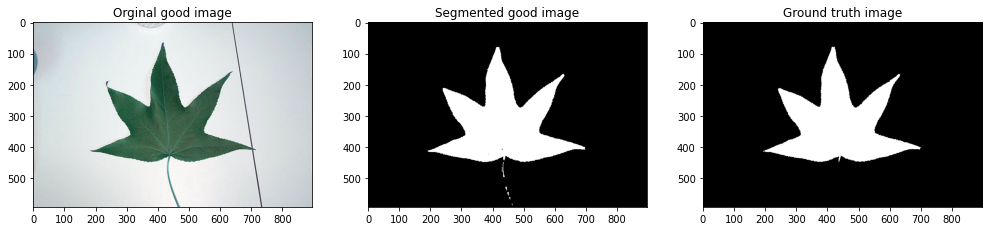

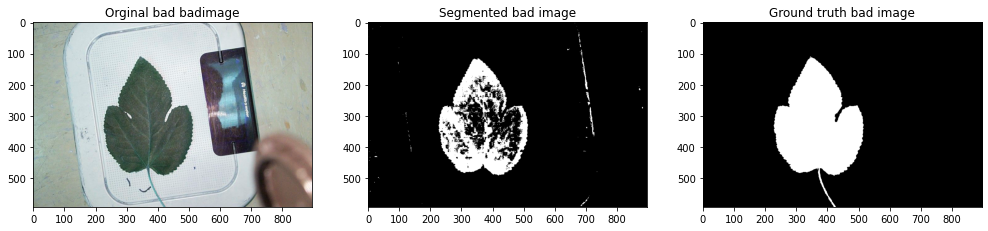

In [ ]:
import matplotlib.pyplot as plt

orginal_image_good = cv2.imread('/content/drive/MyDrive/computer vision/images/image_0001.png')
orginal_image_bad = cv2.imread('/content/drive/MyDrive/computer vision/images/image_0099.png')
segmenation_image_good = cv2.imread('/content/drive/MyDrive/computer vision/segmented_img/bin_thre_image_0001.png')
segmenation_image_bad = cv2.imread('/content/drive/MyDrive/computer vision/segmented_img/bin_thre_image_0099.png')
groundtruth_image_good = cv2.imread('/content/drive/MyDrive/computer vision/groundtruth/threshimage_0001.png')
groundtruth_image_bad = cv2.imread('/content/drive/MyDrive/computer vision/groundtruth/threshimage_0099.png')

plt.figure(figsize=(17,13))
plt.subplot(2,3,1)
plt.imshow(orginal_image_good)
plt.title("Orginal good image")

plt.subplot(2,3,2)
plt.imshow(segmenation_image_good)
plt.title("Segmented good image")

plt.subplot(2,3,3)
plt.imshow(groundtruth_image_good)
plt.title("Ground truth image")
plt.show()

plt.figure(figsize=(17,13))
plt.subplot(2,3,1)
plt.imshow(orginal_image_bad)
plt.title("Orginal bad badimage")

plt.subplot(2,3,2)
plt.imshow(segmenation_image_bad)
plt.title("Segmented bad image")

plt.subplot(2,3,3)
plt.imshow(groundtruth_image_bad)
plt.title("Ground truth bad image")
plt.show()


# Step 5: A time for reflection.

### Answer the following questions right here in this block.

1. In a few sentences, briefly explain what your segmentation algorithm from Step 1 does and how it works.  

	_Your answer:_  it works by converting the colored image to HSV(hue, saturation and value), then the cv2.inRange liberary used to choose the green color part and it enables to determine the upper and lower range values of the green HSV. Use cv2.bitwise to extract or slice the green color part and converts it to gray color and segement the image using thresholding function otsu algorithm. finally it produces a good average value of 0.9514867139833265.
2. Consider your good result.  What, if anything, about your algoirthm is preventing you from getting a better result with this image?  If you weren't able to get any results, leave this blank, or explain what was preventing you from getting a result.

	_Your answer:_ The good segmented image result is the max_value as stated above and it is 0.9921426273951202 which is very accurate and almost similar to the ground truth image. Evenif, it is very accurate there is a bit differ value it can be corrected by adjusting the HSV value.

3. Consider your bad result.  What is it about your algoirthm caused the poor performance?   If you weren't able to get any results, leave this blank.

	_Your answer:as stated above in the code the bad segmented result is min_value which is 0.7655433866891322, which is slightly poor and not acurate due to there may shadow and green like backgrounds in the original image that affects the the the segmentation of the leaf only. However, it can be improved by calculating the geometric properties of the leaf like area, orentation and position and by region growing algorithms.  
